In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd
import plotly.graph_objects as go

In [36]:
data = pd.read_csv("hodograph.csv")
rec_x, rec_y, time = data.to_numpy().T

# СЛУ

In [13]:
r = rec_x**2 + rec_y**2
A = np.vstack((np.ones(len(r)), r)).T
A_inv = np.linalg.pinv(A)
t_0, inv_v = np.sqrt(A_inv@time**2)
v = 1/inv_v

# Минимизация

In [17]:
def sum_time(coefficient, r, time):
    return np.sum((time-np.sqrt(coefficient[0]**2 + r/coefficient[1]**2))**2)


def d_t0(t0, v, r, time):
    return np.sum(2*t0*(np.sqrt(t0**2+r/v**2) - time)/np.sqrt(t0**2+r/v**2))


def d_v(t0, v, r, time):
    return np.sum(2*r**2*(time - np.sqrt(t0**2+r/v**2))/(np.sqrt(t0**2 + r/v**2)*v**3))


def gradient_descent(nitrum, coefficient, step_t0, step_v):
    t0, v = coefficient
    v_arr = np.zeros(nitrum)
    t_arr = np.zeros(nitrum)
    for i in range(nitrum):
        v_arr[i] = v
        t_arr[i] = t0
        t0 -= (step_t0*(nitrum-i)/nitrum)*d_t0(t0, v, r, time)
        v -= (step_v*(nitrum-i)/nitrum)*d_v(t0, v, r, time)
    return v_arr, t_arr


x0 = [0.1, 600]
bnds = ((0, 1), (1, 3000))

optimizer = minimize(sum_time, x0, args=(r, time), bounds=bnds);
result = optimizer.x

# Метод градиентного спуска

In [18]:
nitrum = 1000
step_t0 = 0.01
step_v = 5
v_arr, t_arr = gradient_descent(nitrum, x0, step_t0, step_v)
t0_range = np.linspace(0.01, 0.4, 300)
v_range = np.linspace(400, 1500, 200)
heat_map = [[sum_time((i,j), r, time) for i in t0_range] for j in v_range]

Text(0.5, 1.0, 'Градиентный спуск')

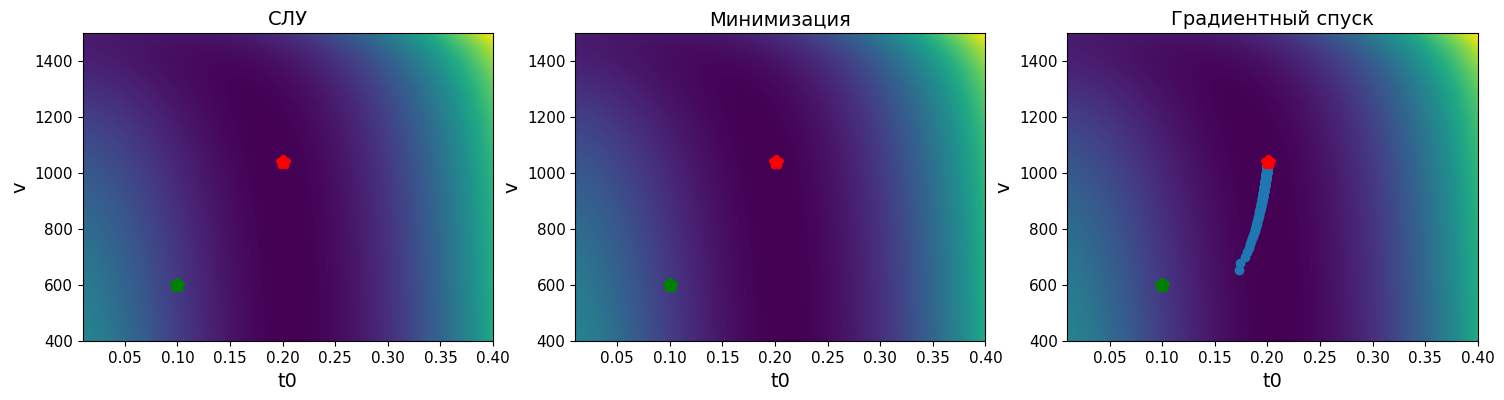

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

ax[0].scatter(result[0], result[1], marker="*",linewidth=5, c="red")
ax[1].scatter(t_0, v, marker="*",linewidth=5, c="red")
ax[2].scatter(t_arr, v_arr)
ax[2].scatter(t_arr[-1], v_arr[-1], marker="*",linewidth=5, c="red")

for i in ax:
    im = i.imshow(heat_map, aspect="auto", extent=[t0_range[0], t0_range[-1], v_range[0], v_range[-1]])
    i.set_xlabel("t0", fontsize=14)
    i.set_ylabel("v", fontsize=14)
    i.tick_params(axis='both', labelsize=11)
    i.scatter(x0[0], x0[1], marker="*",linewidth=5, c="green")

ax[0].set_title("СЛУ", fontsize=14)
ax[1].set_title("Минимизация", fontsize=14)
ax[2].set_title("Градиентный спуск", fontsize=14)